In [1]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


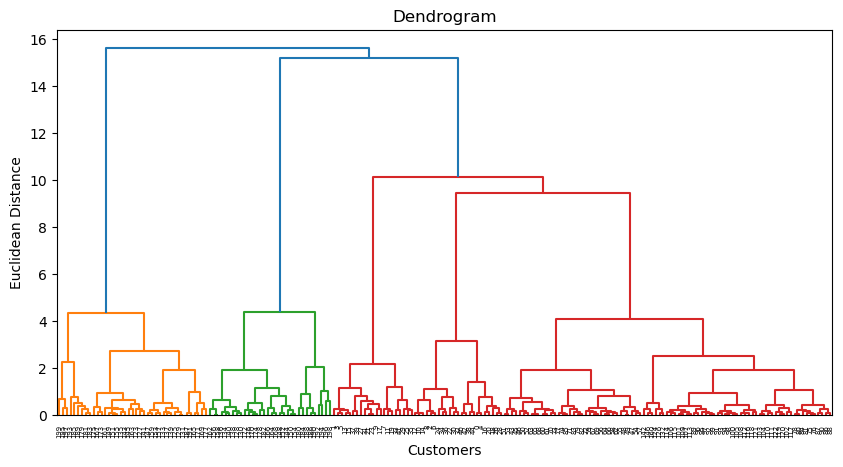

In [3]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


In [4]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)

clusters = agglo.fit_predict(X_scaled)

data['Cluster'] = clusters


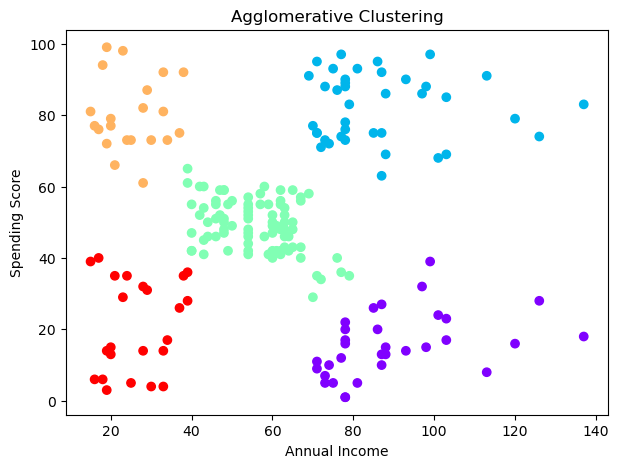

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster'],
    cmap='rainbow'
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Agglomerative Clustering")
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.5538089226688662
